In [3]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset("iris")
X = df.loc[:, df.columns != "species"]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

/Users/dav_id3/Development/analysis-environment/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
print(y_test_one_hot)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]]


In [12]:
from sklearn.metrics import roc_curve, auc
fpr={}
tpr={}
roc_auc={}
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

{0: 1.0, 1: 0.9958847736625515, 2: 0.9946524064171123}


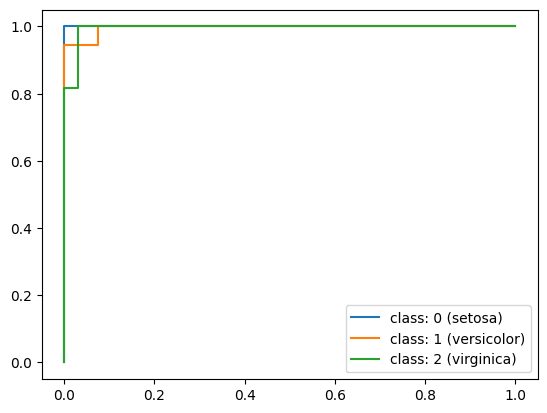

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"class: {i} ({model.classes_[i]})")
plt.legend()
print(roc_auc)

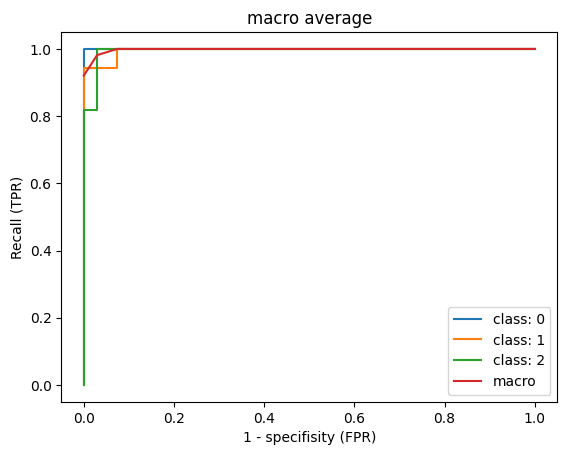

In [24]:
import numpy as np

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(model.classes_))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / len(model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
 
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.title("macro average")
plt.xlabel("1 - specifisity (FPR)")
plt.ylabel("Recall (TPR)")
plt.legend()

In [27]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

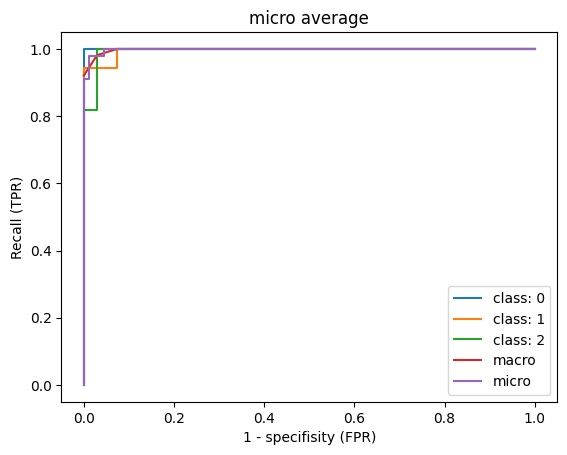

In [28]:
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.title("micro average")
plt.xlabel("1 - specifisity (FPR)")
plt.ylabel("Recall (TPR)")
plt.legend()